In [0]:
# "Unknown"
# "Mine"
# "Number"
# "Clear"
# "END"

In [0]:
import random
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from math import sqrt, fabs
import random
import itertools
import math

In [0]:
class Cell():
  def __init__(self,length,width):
    self.cellType="Unknown"
    self.isUseless=True
    self.length=length
    self.width=width
    self.val=-1
  
  def isUseless(self):
    return self.isUseless
  
  
  def setUseless(self,bools):
    self.isUseless=bools
  
  def getLen(self):
    return self.length
  
  def getWid(self):
    return self.width
  
  def getCellType(self):
    return self.cellType
  
  def setCellType(self,CellType):
    self.cellType=CellType
  
  def setVal(self,val):
    self.val=val
  
  def getVal(self):
    return self.val
    

In [0]:
class Board ():
  
  def __init__(self,length,width,minesTotal):
    self.length = length
    self.width = width
    self.minesTotal = minesTotal
    self.board=[[Cell(i,j)for j in range(width)]for i in range(length)]

#   def printBoard():
#     mines=0
#     for i in range(self.length):
#       for j in range(self.width):
#         if board[i][j]=="Unknown":

  def printBoard(self):
    mines = 0
    b = [['?'for i in range(self.length)] for j in range(self.width)]
    fig, ax = plt.subplots()
    ax.axis('tight')
    ax.axis('off')
    for i in range(self.length):
      for j in range(self.width):
            if(self.board[i][j].getCellType()=="Unknown"):
              b[i][j] = '?'
            elif(self.board[i][j].getCellType() == "Clear"):
              b[i][j] ='-'
            elif(self.board[i][j].getCellType() == "Number"):
              b[i][j] = str(self.board[i][j].getVal())
            elif(self.board[i][j].getCellType() == "Mine"):
              b[i][j] = "M"
              mines+=1
            elif(self.board[i][j].getCellType() == "END"):
              b[i][j] = "X"
    the_table = ax.table(cellText = b, colWidths = [0.04 for x in range(self.length)])
    print("Mines Found:"+ str(mines))
    plt.show()
  
  def getBoard(self):
    return self.board
  
  def getLen(self):
    return self.length
  
  def getWid(self):
    return self.width
  
  def getMinesTotal(self):
    return self.minesTotal
  
  def countUnknowns(self):
    unknowns=0
    for i in range(self.length):
      for j in range(self.width):
        if(self.board[i][j]=="Unknown"):
          unknowns+=1
    return unknowns
  
  def getUnknowns(self):
    unknowns=[]
    for i in range(self.length):
      for j in range(self.width):
        if(self.board[i][j].getCellType()=="Unknown"):
          unknowns.append(self.board[i][j])
    return unknowns
  
  def countMines(self):
    mines=0
    for i in range(self.length):
      for j in range(self.width):
        if(self.board[i][j].getCellType()=="Mine"):
          mines+=1
    return mines
      
  def countNeighborMines(self,cell):
    mines=0
    for i in range(max(0,cell.getLen()-1),min(self.length-1,cell.getLen()+1)+1):
      for j in range(max(0,cell.getWid()-1),min(self.width-1,cell.getWid()+1)+1):
        if i==cell.getLen() and j==cell.getWid():
          continue
        elif self.board[i][j].getCellType()=="Mine":
          mines+=1
    return mines
  
  def countNeighborUnknowns(self,cell):
    unknowns=0
    for i in range(max(0,cell.getLen()-1),min(self.length-1,cell.getLen()+1)+1):
      for j in range(max(0,cell.getWid()-1),min(self.width-1,cell.getWid()+1)+1):
        if i==cell.getLen() and j==cell.getWid():
          continue
        elif self.board[i][j].getCellType()=="Unknown":
          unknowns+=1
    return unknowns
        
  def getNeighbor(self,cell):
    neighbor=[]
    for i in range(max(0,cell.getLen()-1),min(self.length-1,cell.getLen()+1)+1):
      for j in range(max(0,cell.getWid()-1),min(self.width-1,cell.getWid()+1)+1):
        if i==cell.getLen() and j==cell.getWid():
          continue
        else:
          neighbor.append(self.board[i][j])
    return neighbor

  def getNeighborUnknowns(self,cell):
    neighbor=[]
    for i in range(max(0,cell.getLen()-1),min(self.length-1,cell.getLen()+1)+1):
      for j in range(max(0,cell.getWid()-1),min(self.width-1,cell.getWid()+1)+1):
        if i==cell.getLen() and j==cell.getWid():
          continue
        else:
            if(self.board[i][j].getCellType()=="Unknown"):
                neighbor.append(self.board[i][j])
    return neighbor
  

In [0]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

def diff(lst1, lst2): 
    return (list(set(lst1) - set(lst2))) 
    return lst3 

In [0]:
class Sweeper():
  
    def __init__(self,board,randBoard,death="on"):
        self.board=board
        self.randBorad=randBoard
        self.death=death
        self.failure=0
    
  

  #  find one unknown position as the random guess location
    def randomGuess(self):
#       print(self.board.countMines())
#       print("!!!")
      if self.board.countMines()==0:
        randLen=random.randint(0,self.board.getLen()-1)
        randWid=random.randint(0,self.board.getWid()-1)
        while(self.board.board[randLen][randWid].getCellType()!="Unknown"):
          randLen=random.randint(0,self.board.getLen()-1)
          randWid=random.randint(0,self.board.getWid()-1)
        guessPosition=[]
        guessPosition.append([randLen,randWid])
        return guessPosition

      else:
        minPosibility=1
        guessPosition=[0]
        if self.board.countUnknowns()==0:
            normalP=0
        else:
            normalP=(self.board.getMinesTotal()-self.board.countMines())/self.board.countUnknowns()
        pb=[[1.0 for i in range(self.board.getWid())]for j in range(self.board.getLen())]
        for i in range (self.board.getLen()):
          for j in range (self.board.getWid()):
            cell=self.board.board[i][j]
            if cell.getCellType()=="Unknown":
              neighborP=[]
              for m in range(max(0,cell.getLen()-1),min(self.board.getLen()-1,cell.getLen()+1)+1):
                for n in range(max(0,cell.getWid()-1),min(self.board.getWid()-1,cell.getWid()+1)+1):
                    if self.board.board[m][n].getVal()<9 and self.board.board[m][n].getVal()>0:
                      total=self.board.board[m][n].getVal()
                      mines=self.board.countNeighborMines(self.board.board[m][n])
                      neighborP.append((total-mines)/8)
              a=0
              num=0
              for ele in neighborP:
                a+=1
                num*=ele
              if a==0:
                pb[i][j]=normalP
              else:
  #               print("!!!")
  #               print(i,j,num)
                pb[i][j]=num

#         print(pb)
        for i in range (self.board.getLen()):
            for j in range (self.board.getWid()):
              if pb[i][j]<=minPosibility:
                minPosibility=pb[i][j]
                guessPosition[0]=[i,j]
  #       print("-------------test----------------")
  #       print(guessPosition)
  #       print("-------------test----------------")
        return guessPosition
    
    def guess(self):
        print("Guessing...")
        guessPosition=self.randomGuess()
        print("Guessed Position",guessPosition)
        if not self.runSweeper(guessPosition):
            return False
        return True
  
  #Run
  #direct
    def solve(self):
        searchPosition=self.search()        
        inferPosition=self.infer()
        while searchPosition or inferPosition:  
#             if not self.runSweeper(searchPosition):
#                 return False
#             searchPosition=self.search()
#             self.runSweeper(searchPosition)
#             if searchPosition:
#                 continue
#             inferPosition=self.infer()
#             if not self.runSweeper(inferPosition):
#                 return False           
            while searchPosition:
                survive=self.runSweeper(searchPosition)
                if not survive:
                    return False
                searchPosition=self.search()
            inferPosition=self.infer()
            while inferPosition:
                survive=self.runSweeper(inferPosition)
                if not survive:
                    return False
                inferPosition=self.infer()
            searchPosition=self.search()
        return True
    
    def simpleSolve(self):
        searchPosition=self.search()
        while searchPosition:
            survive=self.runSweeper(searchPosition)
            if not survive:
                return False
            searchPosition=self.search()
        return True
    
    def search(self):
        print("Searching...")
        searchPosition=[]
        for i in range (self.board.getLen()):
          for j in range (self.board.getWid()):
            if not self.board.board[i][j].isUseless:
#               print("~~~~")
              cell=self.board.board[i][j]
              if cell.getCellType()=="Mine":
                cell.setUseless(True)
                break
              elif cell.getCellType()=="Number":
#                 print("----------_________________________--------")
#                 print(self.board.countNeighborUnknowns(cell),cell.getVal(),self.board.countNeighborMines(cell))
#                 print("----------_________________________--------")
                if self.board.countNeighborMines(cell)==cell.getVal():  
                  neighbor=self.board.getNeighbor(cell)
                  for n in neighbor:
                    if n.getCellType()=="Unknown":
                      searchPosition.append([n.getLen(),n.getWid()])
                  cell.setUseless(True)
                elif self.board.countNeighborUnknowns(cell)== cell.getVal()-self.board.countNeighborMines(cell):
                  neighbor=self.board.getNeighbor(cell)
                  for n in neighbor:
                     if n.getCellType()=="Unknown":
                      n.setCellType("Mine")
#                       print("****************")
                      n.setUseless(True)
                  cell.setUseless(True)
                break
              elif cell.getCellType()=="Clear":
                neighbor=self.board.getNeighbor(cell)
#                 for k in neighbor:
#                   print(k.getLen(),k.getWid())
                for n in neighbor:
                  if n.getCellType()=="Unknown" and [n.getLen(),n.getWid()]not in searchPosition:
                    searchPosition.append([n.getLen(),n.getWid()])
    #             print("----------_________________________--------")
    #             print(cell.getLen(),cell.getWid())
    #             print(searchPosition)
    #             print("----------_________________________-------------")
                cell.setUseless(True)
                break
        self.board.printBoard()
        return searchPosition

    def commonUnknowns(self,cell1,cell2):
        common=[]
        for cell in self.board.getNeighborUnknowns(cell1):
            if cell in self.board.getNeighborUnknowns(cell2):
                common.append(cell)
        return common
    
    def computeParameters(self,cell1,cell2):
        n1=cell1.getVal()-self.board.countNeighborMines(cell1)
        n2=cell2.getVal()-self.board.countNeighborMines(cell2)
        c=self.commonUnknowns(cell1,cell2)
        u1=diff(self.board.getNeighborUnknowns(cell1),c)
        u2=diff(self.board.getNeighborUnknowns(cell2),c)
#         print("****************")
#         print("cell1:",cell1.getLen(),cell1.getWid())
#         self.printList(board.getNeighborUnknowns(cell1))
#         print("cell2:",cell2.getLen(),cell2.getWid())
#         self.printList(board.getNeighborUnknowns(cell2))
#         print("n1=",n1)        
#         print("n2=",n2)
#         print("C:")
#         self.printList(c)
#         print("u1:")
#         self.printList(u1)
#         print("u2:")
#         self.printList(u2)
        return n1,n2,c,u1,u2
    
    def printList(self,list):
#         print("list:")
        for cell in list:
            print(cell.getLen(),cell.getWid())
    
    def runInfer(self):
        print("runInfer")
        inferPosition=self.infer()
        if not self.runSweeper(inferPosition):
            print("Died in Infer")
            return False
        return True

    def infer(self):
        print("Inferring")
        knowledgeBase=[]
        searchPosition=[]
        for i in range (self.board.getLen()):
            for j in range(self.board.getWid()):
                cell=self.board.board[i][j]
                if cell.getCellType()=="Number" and self.board.countNeighborUnknowns(cell)!=0:
                    knowledgeBase.append(cell)
        
#         for cell in knowledgeBase:
#             print(cell.getLen(),cell.getWid())
    
        for cell1 in knowledgeBase:
            for cell2 in knowledgeBase:
                if cell1==cell2:
                    continue
                elif self.commonUnknowns(cell1,cell2):
                    n1,n2,c,u1,u2=self.computeParameters(cell1,cell2)
                    min_c = max(max(n1-len(u1),0),max(n2-len(u2),0))
                    max_c = min(min(n1,len(c)),min(n2,len(c)))
#                     print("min_c:",min_c)
#                     print("max_c:",max_c)
                    if min_c==len(c):
                        for cell in c:
                            #print("inferred mine: (",cell.getLen(),",",cell.getWid(),")")
                            cell.setCellType("Mine")
                    elif max_c==0:
                        for cell in c:
                            #print("inferred safe",[cell.getLen(),cell.getWid()])
                            searchPosition.append([cell.getLen(),cell.getWid()])                            
                    if n1-max_c>=len(u1):
                        for cell in u1:
                            #print("inferred mine: (",cell.getLen(),",",cell.getWid(),")")
                            cell.setCellType("Mine")
                    elif n1-min_c==0:
                        for cell in u1:
                            #print("inferred safe",[cell.getLen(),cell.getWid()])
                            searchPosition.append([cell.getLen(),cell.getWid()])                        
                    if n2-max_c>=len(u2):
                        for cell in u2:
                            #print("inferred mine: (",cell.getLen(),",",cell.getWid(),")")
                            cell.setCellType("Mine")
                    elif n2-min_c==0:
                        for cell in u2:
                            #print("inferred safe",[cell.getLen(),cell.getWid()])
                            searchPosition.append([cell.getLen(),cell.getWid()])  
#         print("****************")
        self.board.printBoard()
        print("Inferred Position:",searchPosition)
        return searchPosition
 
    def autoSolve(self,start):
        print("Solve with Inference:")       
        self.runSweeper(start)
        while self.board.countMines()!=self.board.getMinesTotal():
            if not self.solve():
                print("Mines:",self.board.countMines())
                return
            if not self.guess():
                print("Mines:",self.board.countMines())
                return
    
    def autoSimpleSolve(self):
        print("Simple Solve:")
        start=self.randomGuess()
        self.runSweeper(start)
        while self.board.countMines()!=self.board.getMinesTotal():
            if not self.simpleSolve():
                print("***********************************************************")
                print("Mines:",self.board.countMines())
                return start
            if not self.guess():
                print("***********************************************************")
                print("Mines:",self.board.countMines())
                return start        
  
    def runSweeper(self,query):
        l=0
        #print(query)
        for i in query:
            l+=1
        for i in range (l):
        #print(query[i][0],query[i][1])
            val=randBoard[query[i][0]][query[i][1]]
            #print(val)
            cell=self.board.board[query[i][0]][query[i][1]]
            cell.setVal(val)
            cell.setUseless(False)
            if val==9:
                if self.death=="on":
                    cell.setCellType("END")
                    print("You are died")
                    return False
                else:
                    cell.setCellType("Mine")
                    self.failure+=1
                    print("Failure")
                    if self.board.countMines()!=self.board.getMinesTotal():
                        return True
                    else:
                        print("Finish")
                        print("Number of Failures:",self.failure)
                        return False
            elif val==0:
                cell.setCellType("Clear")
            else:
                cell.setCellType("Number")
        if self.board.getMinesTotal()-self.board.countMines()==self.board.getUnknowns():
            unknowns=self.board.getUnkowns()
            for n in unknowns:
                n.setCellType("Mine")
                print("****************")
        if self.board.countMines()==self.board.getMinesTotal():
            print("Finish")
            if self.death=="off":
                print("Number of Failures:",self.failure)
            return False
        return True

In [0]:
def generateRandomBoard(length,wid,mines):
  randBoard=[[0 for i in range(wid)]for j in range(length)]
  k=0
  while k<mines:
    randLen=random.randint(0,length-1)
    randWid=random.randint(0,wid-1)
    if(randBoard[randLen][randWid])!=9:
      randBoard[randLen][randWid]=9
      k+=1
  for i in range(length):
    for j in range(wid):
      if randBoard[i][j]==9:
        continue
      else:
        val=0
        for m in range(max(0,i-1),min(length-1,i+1)+1):
          for n in range(max(0,j-1),min(wid-1,j+1)+1):
            if randBoard[m][n]==9:
              val+=1
        randBoard[i][j]=val
  return randBoard
            
def setBoard():
# 0:clear, 9:mine,1-8:number  
    randBoard=[[0,0,0,0,0],[2,2,1,1,1],[9,9,1,1,9],[9,3,1,1,1],[1,1,0,0,0]]
    board=Board(5,5,3)
    
    board.board[2][0].setVal(9)
    for i in [2,3,4]:
        for j in range(5):
            board.board[i][j].setVal(randBoard[i][j])
    board.board[4][4].setVal(0)
    
    board.board[2][0].setCellType("Mine")
    board.board[3][0].setCellType("Mine")
    board.board[3][1].setCellType("Number")
    board.board[3][2].setCellType("Number")
    board.board[3][3].setCellType("Number")
    board.board[3][4].setCellType("Number")
    board.board[4][0].setCellType("Number")
    board.board[4][1].setCellType("Number")
    board.board[4][2].setCellType("Clear")
    board.board[4][3].setCellType("Clear")
    board.board[4][4].setCellType("Clear")
    
    
    board.printBoard()
    return randBoard,board
    
def printRand(rand):
  for i in rand:
      if i==9:
        print("M")
      else:
        print(str(i))
      
        


[[0, 2, 9, 2, 0, 0, 0, 0, 0, 0], [1, 3, 9, 2, 0, 0, 0, 0, 0, 0], [9, 3, 1, 1, 1, 1, 1, 0, 1, 1], [9, 2, 1, 1, 2, 9, 2, 1, 2, 9], [1, 1, 1, 9, 2, 2, 3, 9, 3, 2], [0, 0, 1, 1, 1, 1, 9, 2, 3, 9], [0, 0, 0, 0, 0, 1, 1, 1, 2, 9], [1, 1, 0, 0, 0, 0, 0, 0, 1, 1], [9, 2, 2, 2, 1, 0, 0, 0, 1, 1], [1, 2, 9, 9, 1, 0, 0, 0, 1, 9]]
[0, 2, 9, 2, 0, 0, 0, 0, 0, 0]
[1, 3, 9, 2, 0, 0, 0, 0, 0, 0]
[9, 3, 1, 1, 1, 1, 1, 0, 1, 1]
[9, 2, 1, 1, 2, 9, 2, 1, 2, 9]
[1, 1, 1, 9, 2, 2, 3, 9, 3, 2]
[0, 0, 1, 1, 1, 1, 9, 2, 3, 9]
[0, 0, 0, 0, 0, 1, 1, 1, 2, 9]
[1, 1, 0, 0, 0, 0, 0, 0, 1, 1]
[9, 2, 2, 2, 1, 0, 0, 0, 1, 1]
[1, 2, 9, 9, 1, 0, 0, 0, 1, 9]
Simple Solve:
Searching...
Mines Found:0


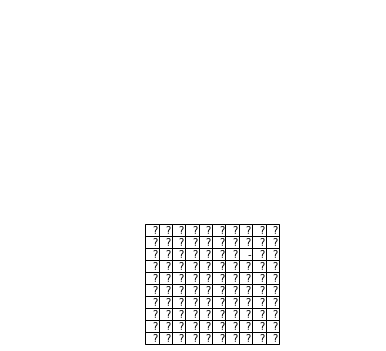

Searching...
Mines Found:0


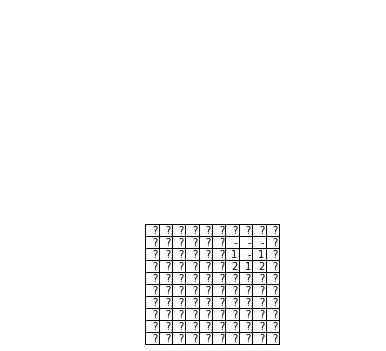

Searching...
Mines Found:0


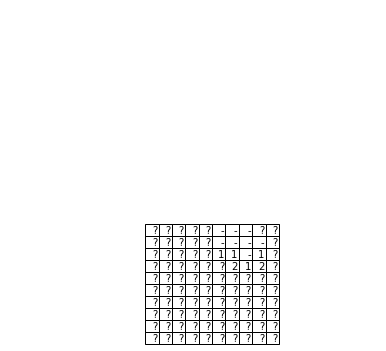

Searching...
Mines Found:0


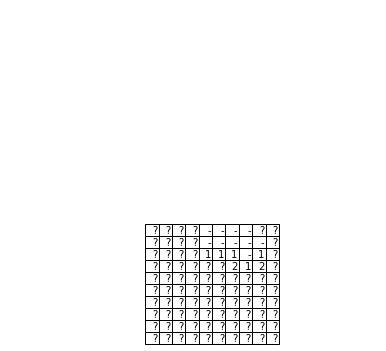

Searching...
Mines Found:2


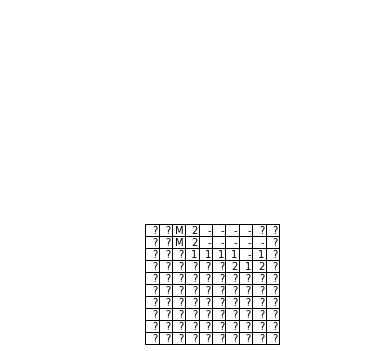

Searching...
Mines Found:2


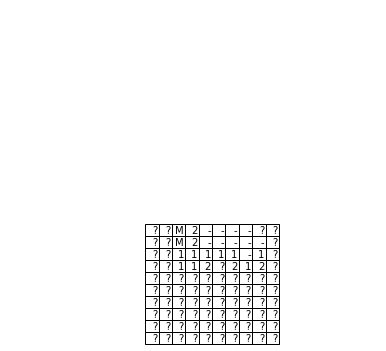

Searching...
Mines Found:2


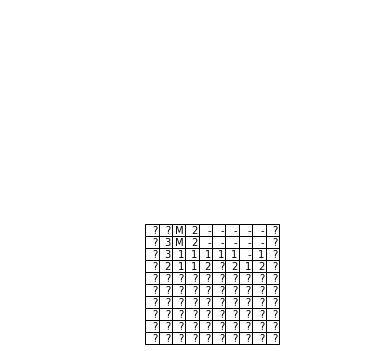

Guessing...
Guessed Position [[9, 9]]
You are died
***********************************************************
Mines: 2
Solve with Inference:
Searching...
Mines Found:0


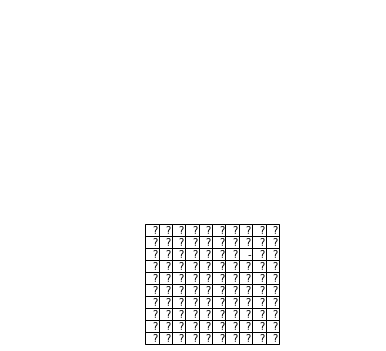

Inferring
Mines Found:0


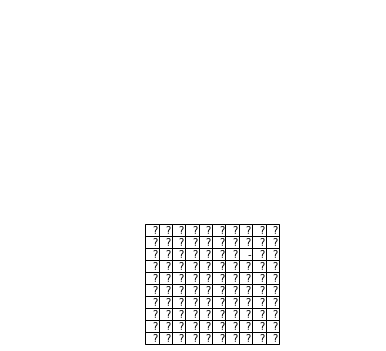

Inferred Position: []
Searching...
Mines Found:0


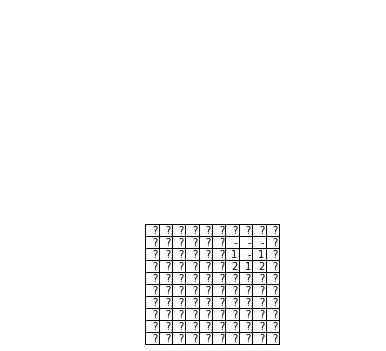

Searching...
Mines Found:0


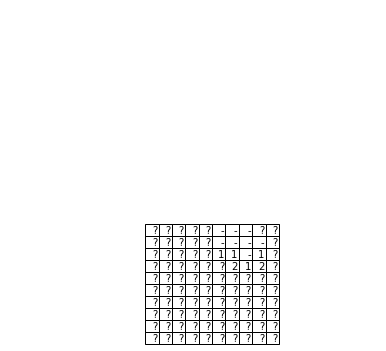

Searching...
Mines Found:0


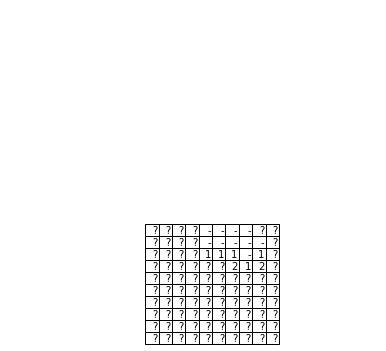

Searching...
Mines Found:2


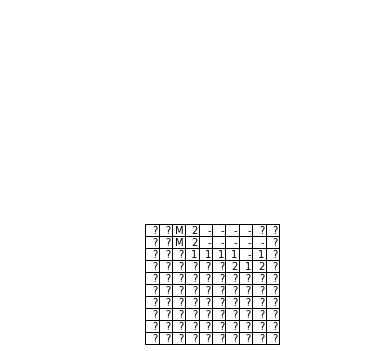

Searching...
Mines Found:2


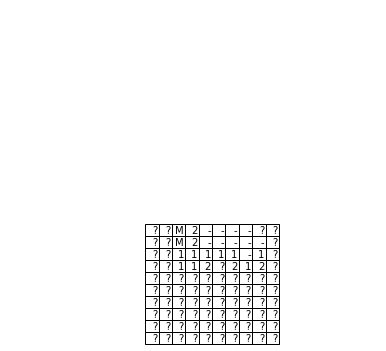

Searching...
Mines Found:2


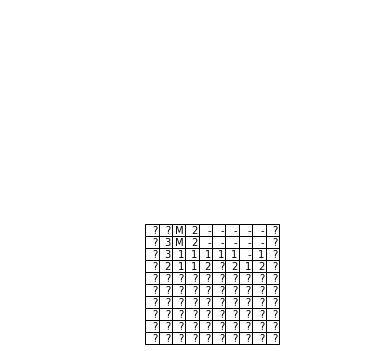

Inferring
Mines Found:4


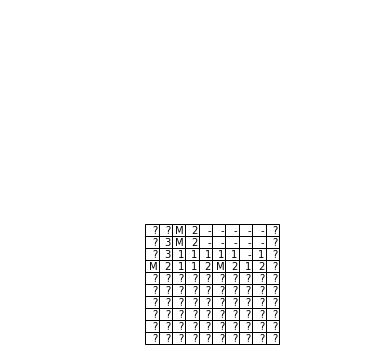

Inferred Position: [[0, 1], [0, 0], [0, 1], [0, 0]]
Inferring
Mines Found:6


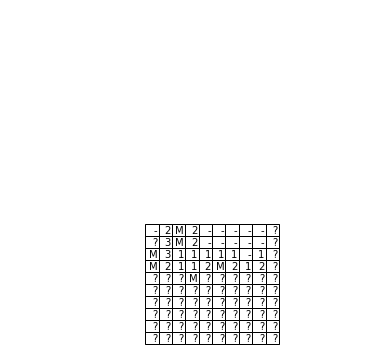

Inferred Position: [[1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [4, 1], [4, 2], [4, 0], [4, 2], [4, 0], [4, 1], [4, 4], [4, 1], [4, 2], [4, 0], [4, 2], [4, 1], [4, 4], [4, 2], [4, 4], [4, 0], [4, 1], [4, 2], [4, 4], [4, 1], [4, 4], [4, 2], [4, 5], [4, 4], [4, 5], [4, 2], [4, 5], [4, 4], [4, 5], [4, 4]]
Inferring
Mines Found:6


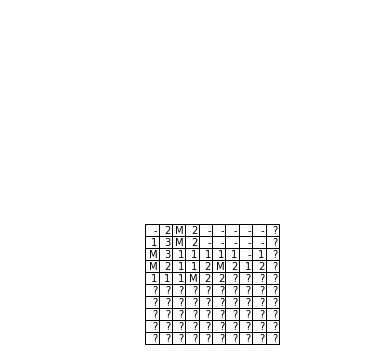

Inferred Position: [[4, 8], [4, 8], [5, 0], [5, 1], [5, 2], [5, 1], [5, 0], [5, 3], [5, 2], [5, 0], [5, 1], [5, 2], [5, 1], [5, 2], [5, 0], [5, 3], [5, 1], [5, 3], [5, 2], [5, 0], [5, 1], [5, 2], [5, 3], [5, 0], [5, 3], [5, 1], [5, 2], [5, 4], [5, 5], [5, 3], [5, 4], [5, 5], [5, 1], [5, 2], [5, 4], [5, 5], [5, 3], [5, 4], [5, 5], [5, 3]]
Inferring
Mines Found:6


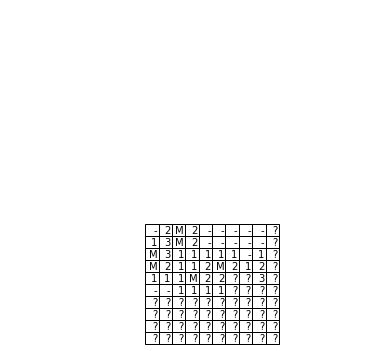

Inferred Position: [[6, 4], [6, 6], [6, 5], [6, 2], [6, 3], [6, 1], [6, 4], [6, 3], [6, 2], [6, 1], [6, 4], [6, 5], [6, 2], [6, 3], [6, 4], [6, 1], [6, 3], [6, 4], [6, 2], [6, 5], [6, 4], [6, 2], [6, 3], [6, 3], [6, 4], [6, 5], [6, 2], [6, 1], [6, 3], [6, 4], [6, 5], [6, 2], [6, 4], [6, 5], [6, 3], [6, 4], [6, 6], [6, 5], [6, 4], [6, 2], [6, 3], [6, 4], [6, 5], [6, 3]]
Inferring
Mines Found:6


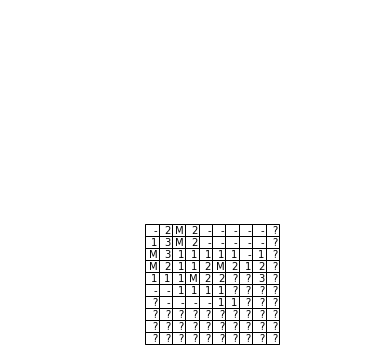

Inferred Position: []
Searching...
Mines Found:6


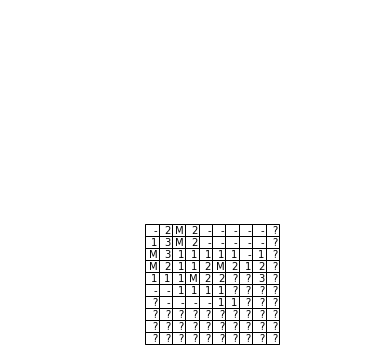

Searching...
Mines Found:6


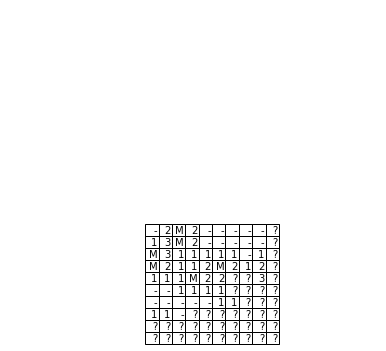

Inferring
Mines Found:6


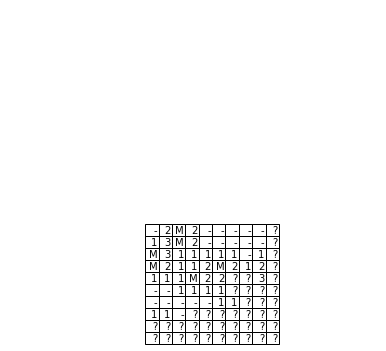

Inferred Position: [[8, 2], [8, 2]]
Inferring
Mines Found:6


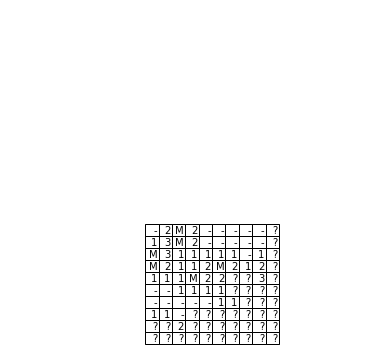

Inferred Position: []
Searching...
Mines Found:6


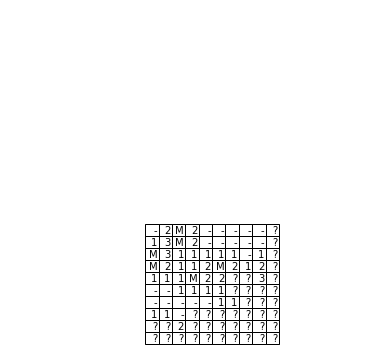

Searching...
Mines Found:6


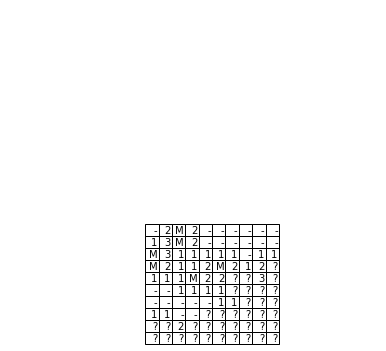

Searching...
Mines Found:7


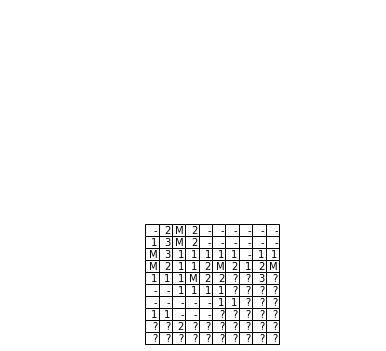

Searching...
Mines Found:7


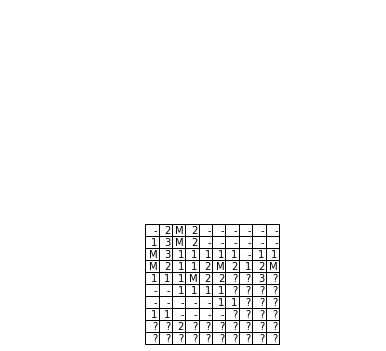

Inferring
Mines Found:7


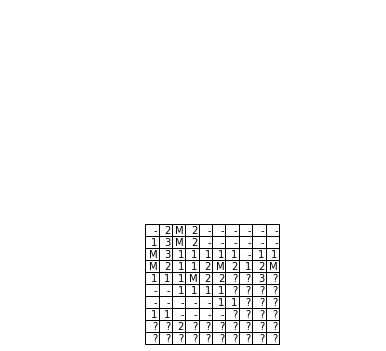

Inferred Position: [[5, 7], [7, 7], [6, 7], [5, 7], [7, 7], [6, 7]]
Inferring
Mines Found:7


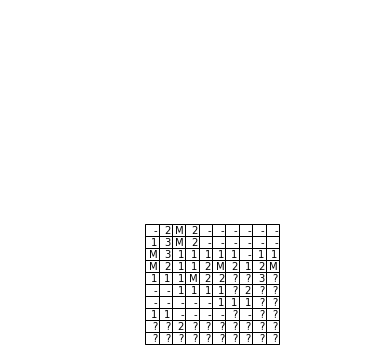

Inferred Position: [[7, 8], [6, 8], [5, 8], [7, 8], [6, 8], [5, 8], [7, 8], [6, 8], [5, 8], [7, 8], [6, 8], [5, 8]]
Inferring
Mines Found:11


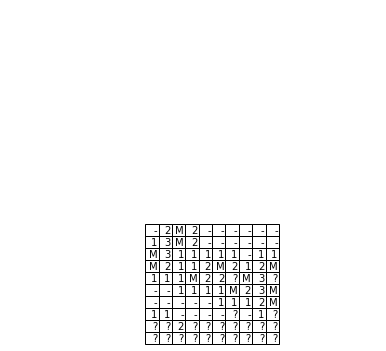

Inferred Position: [[4, 6], [4, 6], [4, 6], [4, 9], [4, 9], [4, 6], [4, 6], [4, 6], [4, 6], [4, 9], [4, 9], [4, 6], [4, 6], [4, 6], [4, 6], [4, 6], [4, 6], [4, 6], [4, 6], [4, 9], [4, 9], [7, 6], [7, 6], [7, 6], [7, 6], [7, 6], [7, 6], [7, 9], [8, 9], [8, 7], [8, 8], [7, 9], [8, 9], [8, 7], [8, 8]]
Inferring
Mines Found:11


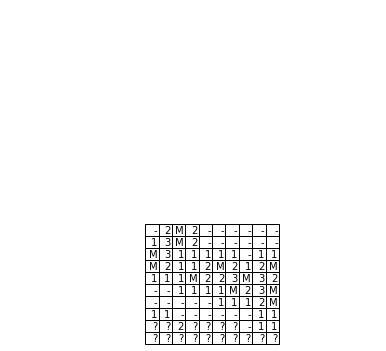

Inferred Position: [[9, 7], [9, 7]]
Inferring
Mines Found:11


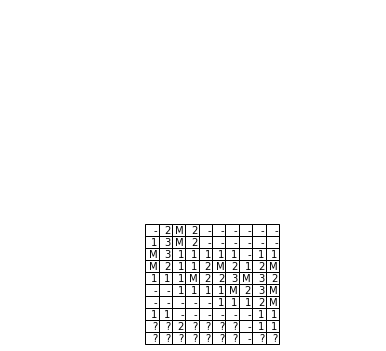

Inferred Position: []
Searching...
Mines Found:11


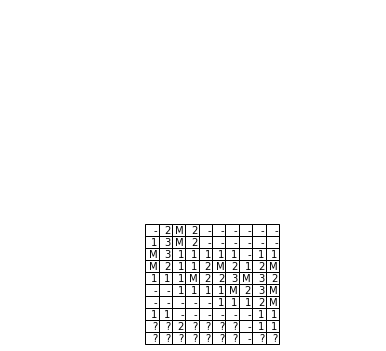

Searching...
Mines Found:11


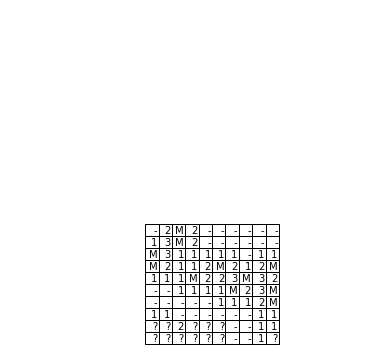

Searching...
Mines Found:11


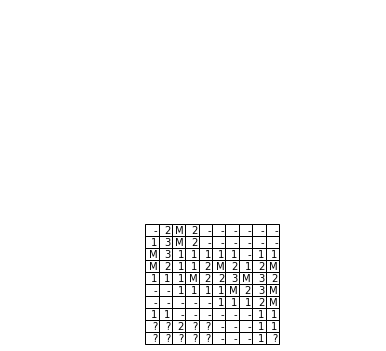

Searching...
Mines Found:11


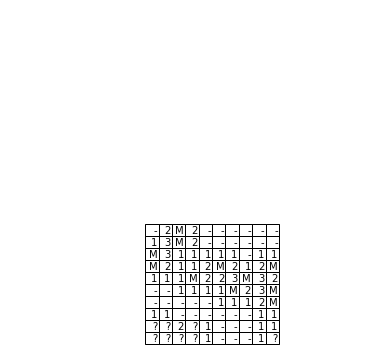

Inferring
Mines Found:12


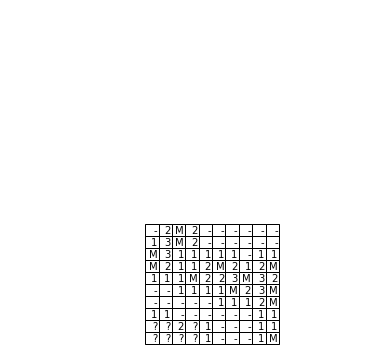

Inferred Position: []
Searching...
Mines Found:12


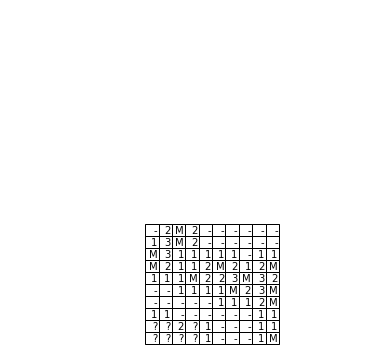

Guessing...
Guessed Position [[9, 3]]
You are died
Mines: 12


In [639]:
# randBoard,board=setBoard()
# printRand(randBoard)
# sweeper=Sweeper(board,randBoard)
# sweeper.runInfer()

length=10
wid=10
mines=15
randBoard=generateRandomBoard(length,wid,mines)
print(randBoard)
printRand(randBoard)
board1=Board(length,wid,mines)
board2=Board(length,wid,mines)
sweeper1=Sweeper(board1,randBoard,"on")
start=sweeper1.autoSimpleSolve()
sweeper2=Sweeper(board2,randBoard,"on")
sweeper2.autoSolve(start)